In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [12]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ラベルを付ける
y_train = y_train % 2
y_test = y_test % 2

# モデルを定義する
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルをコンパイルする
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデルをトレーニングする
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2730 - accuracy: 0.9519
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0859 - accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0451 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0340 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0280 - accuracy: 0.9903


In [13]:

# 中間層の出力を抽出する
intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                 outputs=model.layers[-2].output)
intermediate_output = intermediate_layer_model.predict(x_train)

print('Intermediate output shape:', intermediate_output.shape)


1875/1875 [==============================] - 4s 2ms/step
Intermediate output shape: (60000, 2)


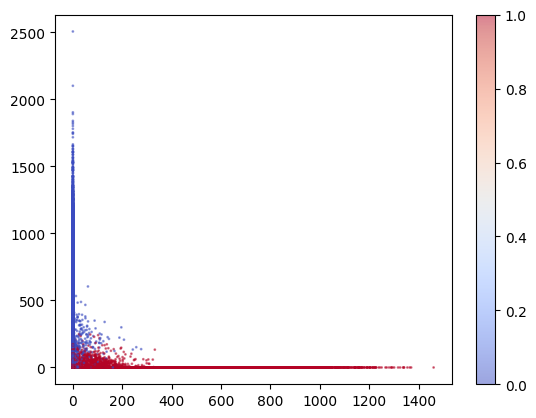

In [16]:
import matplotlib.pyplot as plt

# 散布図をプロットする
plt.scatter(intermediate_output[:, 0], intermediate_output[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, s=1)
plt.colorbar()
plt.show()